{'loss_function': 'MSE', 'save_folder': '../data/mnist/mlp-2-200/zero/all-None-8-8', 'batch_size': 50, 'learning_rate': 0.001, 'weight_decay': 0.01, 'optimization_steps': 100000, 'log_freq': 667}


  0%|          | 0/100000 [00:00<?, ?it/s]

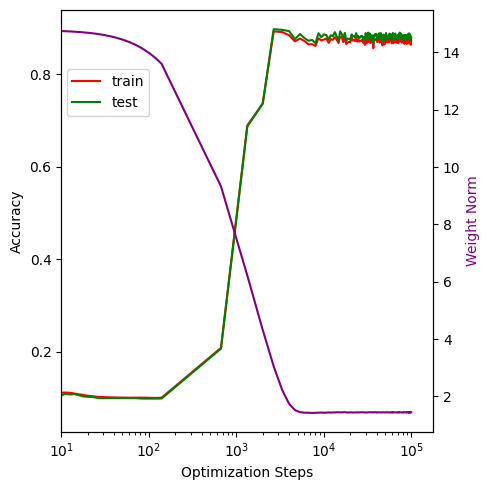

In [4]:
# load necessary modules
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import mlp, math
import torch
import torch.nn as nn
from torchsummary import summary
import torchvision 
from itertools import islice
import mnist
from torchvision import transforms as ts

download_directory = '../data/mnist'
depth, width = 2, 200

dist_dict = {'su': 'standard_uniform', 'sn': 'standard_normal', 'xu': 'xavier_uniform', 'xn': 'xavier_normal', None: 'none',\
             'hu': 'he_uniform', 'hn': 'he_normal', 'torch': 'default'}

# experiment identifier
architecture = f'mlp-{depth}-{width}'
start = f'zero'
alpha, beta = 8, 8
dist_id = None 
dist = f'all-{dist_id}-{alpha}-{beta}'
save_folder = f'../data/mnist/{architecture}/{start}/{dist}'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
optimization_steps = 100000
log_freq = math.ceil(optimization_steps/150)
# load dataset
train = torchvision.datasets.MNIST(root=download_directory, train=True, transform=torchvision.transforms.ToTensor(), download=False)
test = torchvision.datasets.MNIST(root=download_directory, train=False, transform=torchvision.transforms.ToTensor(), download=False)


net = mlp.MLP(depth, width, 784, 10)
net.re_init([1, 2], dist_dict[dist_id], alpha)
net.learn(mnist, train, test, loss_function='MSE', device=device, save_folder=save_folder, weight_decay=1e-2,\
          optimization_steps=optimization_steps, batch_size=50, log_freq=log_freq)

In [3]:
for i, p in enumerate(net.parameters()):
    print(i, p.data.shape)

0 torch.Size([200, 784])
1 torch.Size([200])
2 torch.Size([10, 200])
3 torch.Size([10])
